In [1]:
#데이터 불러오기
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
# 결측치 확인
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [3]:
# x,y 분리
x=df.drop("Outcome", axis=1)
y=df["Outcome"]
x.shape, y.shape

((768, 8), (768,))

<Axes: ylabel='count'>

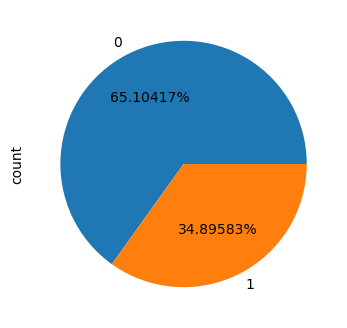

In [4]:
#라벨 확인
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (4,4)
y.value_counts().plot(kind='pie', autopct='%0.05f%%')

In [5]:
#train-test 분류
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((576, 8), (192, 8), (576,), (192,))

In [6]:
# 특성 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train,x_test

(array([[-1.16000148,  1.30743255,  0.34983674, ...,  2.72836004,
          0.95932999, -0.69219345],
        [ 1.21357171, -0.92853791,  0.6686753 , ...,  0.49209482,
          0.40191418,  2.92244864],
        [-0.86330483,  0.7405668 ,  0.6686753 , ...,  1.21633981,
          0.46672997, -0.44000912],
        ...,
        [ 0.32348176, -0.36167216, -0.39411988, ...,  0.51750692,
          0.16533653, -0.69219345],
        [-0.86330483,  0.23668613,  0.6686753 , ..., -0.53709542,
         -1.12773852, -0.94437778],
        [ 0.02678511,  0.26817867, -0.50039939, ..., -0.53709542,
          0.2074668 , -0.18782479]]),
 array([[-0.56660818,  0.04773088,  0.03099819, ...,  0.64456745,
         -0.39856086, -0.52407056],
        [-0.26991153, -1.33794095, -1.03179698, ..., -0.09238359,
         -0.6967135 , -0.60813201],
        [ 0.32348176, -0.17271691,  0.34983674, ..., -0.06697148,
         -0.38883849,  0.90497398],
        ...,
        [ 0.62017841,  1.05549221,  0.24355723, ..., -

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models

#신경망 생성
model=models.Sequential()
model.add(layers.Conv1D(32, 3, activation='relu', input_shape=(8,1)))
model.add(layers.MaxPooling1D(2))

model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#모델 출력
model.summary()

C:\Users\김찬희\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 6, 32)               │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 3, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,265 (12.75 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# 컴파일, 훈련

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20)

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6780 - loss: 0.6467
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7135 - loss: 0.5634
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7511 - loss: 0.5316
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7471 - loss: 0.5148
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7790 - loss: 0.4671
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7625 - loss: 0.4890
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8131 - loss: 0.4286
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8004 - loss: 0.4651
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8102 - loss: 0.4258
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7952 - loss: 0.4442
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8095 - loss: 0.4487
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8222 - lo

In [9]:
# 테스트
test_loss, test_acc = model.evaluate(x_test, y_test)

print("loss :",test_loss)
print("accuracy :",test_acc)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7746 - loss: 0.5113 
loss : 0.5792708992958069
accuracy : 0.7291666865348816
